In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Polygon
from os import listdir
%matplotlib inline
from itertools import combinations

Sto plottando semplicemente il numero di hit vs i relativi conteggi

eventi totali: 4834
eventi buoni: 2406
% dati buoni data260.txt : 49.77244517997518 %
8182
numero bins 79
eventi totali: 2334
eventi buoni: 1464
% dati buoni data261.txt : 62.724935732647815 %
4070
numero bins 83
eventi totali: 553
eventi buoni: 362
% dati buoni data263.txt : 65.46112115732369 %
1502
numero bins 64
eventi totali: 2996
eventi buoni: 1674
% dati buoni data262.txt : 55.874499332443264 %
5367
numero bins 68


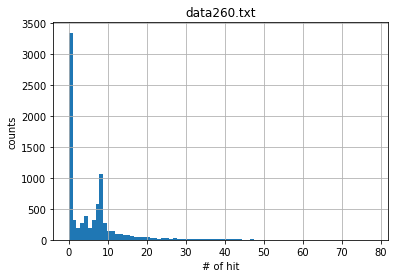

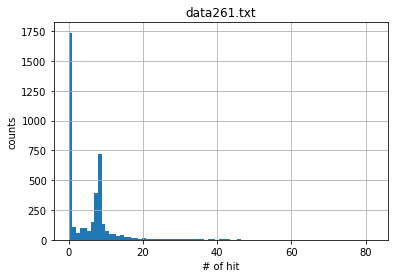

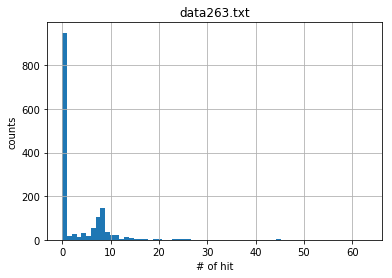

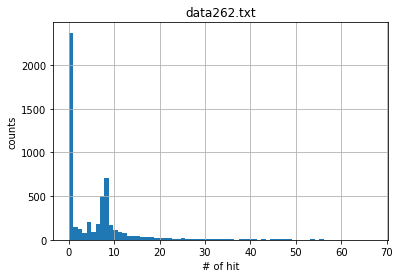

In [2]:
for i in listdir("/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"):
    file="/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"+"/"+i
    with open(file) as f:
        hit_num=[]
        for line in f:
            event = line.split()
            event = [float(i) for i in event]
            hit_num.append(event[1])
        eventi_tot=len(hit_num)+1
        eventi_buoni=0
        for j in hit_num: 
            if j==0: #qua voglio togliere da eventi_tot tutti gli eventi che hanno 0 hit
                eventi_tot-=1
            elif (j==6 or j==7 or j==8 or j==9 or j==10): #qua conto solo quelli che hanno 6/7/8/9/10 hit
                eventi_buoni+=1
    print("eventi totali:",eventi_tot)
    print("eventi buoni:",eventi_buoni)
    print("% dati buoni",i, ":", eventi_buoni/eventi_tot*100, "%")
    print(len(hit_num))
    bins=int(max(hit_num))+1
    #bins=[i for i in range(0,15)] #per plottare solo i dati più interessanti: avere ≈80 bin è inutile
    print("numero bins",bins)
    plt.figure()
    plt.hist(hit_num,bins)
    plt.xlabel("# of hit")
    plt.ylabel("counts")
    plt.title(i) 
    plt.grid(True)
    titolo=i+".png"
    plt.savefig(titolo)

In [3]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
0         1    0        0      4     165.5     170.5     45.5   45.8   
1         1    1        0      1     101.4     108.6      6.5   66.7   
2         1    2        0      2     113.0     139.0     19.5  241.7   

   XL_global  XR_global  Z_global  
0      828.7      823.7     869.0  
1      892.8      885.6     830.0  
2      881.2      855.2     843.0  
[ 1.69725275 86.18214286]
coefficiente migliore: [ 1.69725275 86.18214286]
Chi^2 migliore: 61.320714285714395


/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


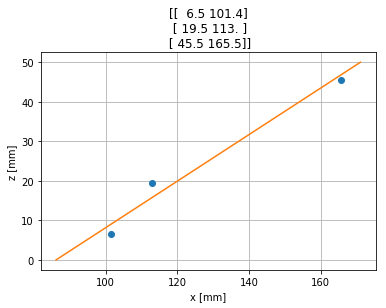

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
3         1    3        3      3     19.92     22.08     32.5   20.0   
4         1    4        3      4     28.40     55.60     45.5  252.5   
5         1    5        3      1     11.22     30.78      6.5  181.7   

   XL_global  XR_global  Z_global  
3    -281.42    -283.58      32.5  
4    -289.90    -317.10      45.5  
5    -272.72    -292.28       6.5  
[0.42538462 7.865     ]
[0.43725275 8.25071429]
coefficiente migliore: [0.43725275 8.25071429]
Chi^2 migliore: 0.22631428571428736


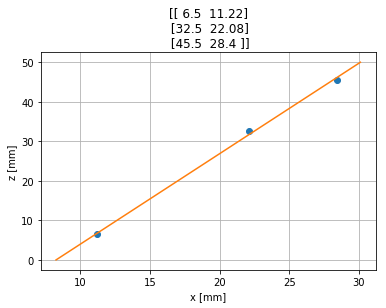

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
0         2    0        2      3     355.0     359.0     32.5   36.7   
1         2    1        2      1     355.3     358.7      6.5   30.8   
2         2    2        2      4     316.0     356.0     45.5  371.7   

   XL_global  XR_global  Z_global  
0     -622.4     -626.4     856.0  
1     -622.7     -626.1     830.0  
2     -583.4     -623.4     869.0  
[ -0.86538462 366.475     ]
[1.37362637e-02 3.55046429e+02]
coefficiente migliore: [1.37362637e-02 3.55046429e+02]
Chi^2 migliore: 0.37785714285710925


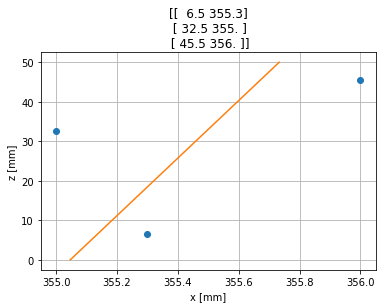

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
3         2    3        3      2     327.4     344.6     19.5  160.0   
4         2    4        3      1     343.9     370.1      6.5  243.3   
5         2    5        3      4     328.0     344.0     45.5  149.2   
6         2    6        3      3     344.4     369.6     32.5  233.3   

   XL_global  XR_global  Z_global  
3     -588.9     -606.1      19.5  
4     -605.4     -631.6       6.5  
5     -589.5     -605.5      45.5  
6     -605.9     -631.1      32.5  
Chi^2 migliore: 0.32700000000001567


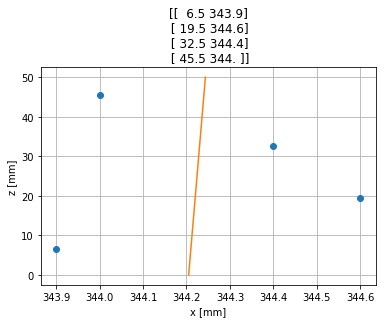

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
1         4    1        2      2     165.8     170.2     19.5   41.7   
2         4    2        2      4     160.6     175.4     45.5  137.5   
3         4    3        2      1     127.7     166.3      6.5  359.2   
4         4    4        2      3     131.8     162.2     32.5  282.5   

   XL_global  XR_global  Z_global  
1     -433.2     -437.6     843.0  
2     -428.0     -442.8     869.0  
3     -395.1     -433.7     830.0  
4     -399.2     -429.6     856.0  
Chi^2 migliore: 1.603000000000023


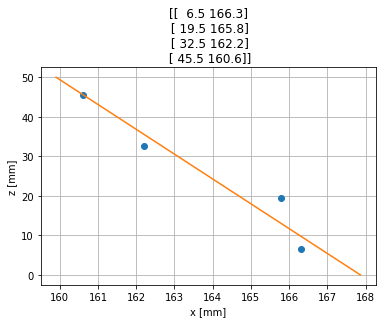

    EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
5          4    5        3      2    40.560     43.44     19.5   26.7   
6          4    6        3      1    13.950     28.05      6.5  130.8   
7          4    7        3      4    35.310     48.69     45.5  124.2   
8          4    8        3      3    18.530     23.47     32.5   45.8   
9          4    9        3      2    25.940     58.06     19.5  298.3   
10         4   10        3      3     2.871     39.13     32.5  336.7   
11         4   11        3      1    48.240     77.76      6.5  274.2   

    XL_global  XR_global  Z_global  
5    -302.060    -304.94      19.5  
6    -275.450    -289.55       6.5  
7    -296.810    -310.19      45.5  
8    -280.030    -284.97      32.5  
9    -287.440    -319.56      19.5  
10   -264.371    -300.63      32.5  
11   -309.740    -339.26       6.5  
Chi^2 migliore: 0.24010000000000195


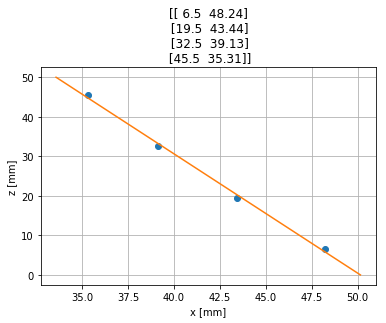

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
0         5    0        2      2     76.95     91.05     19.5  130.8   
1         5    1        2      3     49.67     76.33     32.5  247.5   
2         5    2        2      4     74.94     93.06     45.5  168.3   
3         5    3        2      1     48.33     77.67      6.5  272.5   

   XL_global  XR_global  Z_global  
0    -344.35    -358.45     843.0  
1    -317.07    -343.73     856.0  
2    -342.34    -360.46     869.0  
3    -315.73    -345.07     830.0  
Chi^2 migliore: 0.15007000000000326


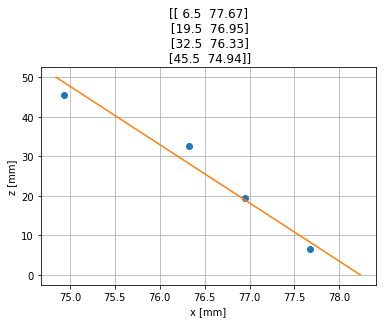

    EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
4          5    4        3      4     41.60     42.40     45.5    7.5   
5          5    5        3      3    186.90    191.10     32.5   39.2   
6          5    6        3      2     40.65     43.35     19.5   25.0   
7          5    7        3      1    142.10    151.90      6.5   91.7   
8          5    8        3      4    153.20    182.80     45.5  275.0   
9          5    9        3      1     43.62     82.38      6.5  360.0   
10         5   10        3      3     43.12     82.88     32.5  369.2   

    XL_global  XR_global  Z_global  
4     -303.10    -303.90      45.5  
5     -448.40    -452.60      32.5  
6     -302.15    -304.85      19.5  
7     -403.60    -413.40       6.5  
8     -414.70    -444.30      45.5  
9     -305.12    -343.88       6.5  
10    -304.62    -344.38      32.5  
Chi^2 migliore: 0.06466999999999995


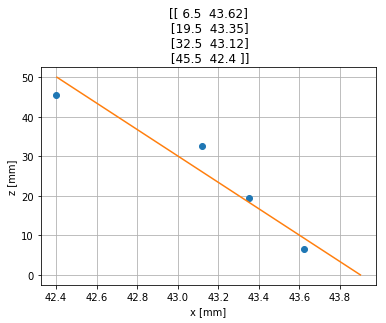

   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local   Time  \
0         7    0        0      3    521.50    528.50     32.5   64.2   
1         7    1        0      2     72.60     95.40     19.5  211.7   
2         7    2        0      4     72.06     95.94     45.5  221.7   
3         7    3        0      3    509.80    540.20     32.5  282.5   
4         7    4        0      4     22.21     61.79     45.5  367.5   

   XL_global  XR_global  Z_global  
0     472.70     465.70     856.0  
1     921.60     898.80     843.0  
2     922.14     898.26     869.0  
3     484.40     454.00     856.0  
4     971.99     932.41     869.0  
coefficiente migliore: [[0. 0. 0.]
 [0. 0. 0.]]
Chi^2 migliore: 1000


TypeError: 'int' object is not subscriptable

<Figure size 432x288 with 0 Axes>

In [13]:
for i in listdir("/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"):
    file="/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"+"/"+i
    with open(file) as f:
        for line in f:
            event = line.split()
            event = [float(i) for i in event]
            event_number = int(event[0])
            hits_number  = int(event[1])
            hit       = np.arange(hits_number)
            chamber   = np.fromiter((event[2+5*i] for i in range(hits_number)), int)
            layer     = np.fromiter((event[3+5*i] for i in range(hits_number)), int)
            xl_local  = np.fromiter((event[4+5*i] for i in range(hits_number)), float)
            xr_local  = np.fromiter((event[5+5*i] for i in range(hits_number)), float)
            z_local   = np.fromiter((local_z_shifts[i-1]+ZCELL/2 for i in layer), float)
            time      = np.fromiter((event[6+5*i] for i in range(hits_number)), float)
            xl_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xl_local
            xr_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xr_local
            z_global  = np.fromiter((global_z_shifts[i] for i in chamber), float) + z_local
            dataframe = pd.DataFrame(
                { 'EvNumber' : event_number,
                  'Hit'      : hit,
                  'Chamber'  : chamber,
                  'Layer'    : layer,
                  'XL_local' : xl_local,
                  'XR_local' : xr_local,
                  'Z_local'  : z_local,
                  'Time'     : time,
                  'XL_global': xl_global,
                  'XR_global': xr_global,
                  'Z_global' : z_global,
                })
            #dataframe.set_index('Hit', inplace=True) # set as index the number of the hit
            #print(dataframe)
            for j in range(0,4):
                dataframe1=dataframe.loc[dataframe['Chamber'] == j] #in questo modo ottengo un dataframe per ogni evento e chamber
                #print(dataframe1)
                unici=dataframe1['Layer'].nunique() 
                if unici>=3: #mi assicuro che ci siano almeno 3 hit in 3 layer diversi
                    xl=np.array(dataframe1['XL_local'])
                    #print(xl)
                    xr=np.array(dataframe1['XR_local'])
                    #print(xr)
                    z=np.array(dataframe1['Z_local'])
                    #print(z)
                    
                    puntir=[]
                    for j in range(0,np.shape(z)[0]):
                        puntir.append((z[j],xr[j]))
                    #print(puntir)
                    puntil=[]
                    for j in range(0,np.shape(z)[0]):
                        puntil.append((z[j],xl[j]))
                    #print(puntil)
                    layer1=[]
                    layer2=[]
                    layer3=[]
                    layer4=[]
                    for j in puntil:
                        if j[0]==6.5:
                            layer1.append(j)
                        elif j[0]==19.5:
                            layer2.append(j)
                        elif j[0]==32.5:
                            layer3.append(j)
                        elif j[0]==45.5:
                            layer4.append(j)
                    for j in puntir:
                        if j[0]==6.5:
                            layer1.append(j)
                        elif j[0]==19.5:
                            layer2.append(j)
                        elif j[0]==32.5:
                            layer3.append(j)
                        elif j[0]==45.5:
                            layer4.append(j)
                    #print(layer1)
                    #print(layer2)
                    #print(layer3)
                    #print(layer4)
                    if unici==3: #PER CREARE LE COMBINAZIONI CON 3 ELEMENTI
                        if len(layer1)==0:
                            combinazioni=np.array([(x,y,z) for x in layer2 for y in layer3 for z in layer4])
                        elif len(layer2)==0:
                            combinazioni=np.array([(x,y,z) for x in layer1 for y in layer3 for z in layer4])
                        elif len(layer3)==0:
                            combinazioni=np.array([(x,y,z) for x in layer1 for y in layer2 for z in layer4])
                        elif len(layer4)==0:
                            combinazioni=np.array([(x,y,z) for x in layer1 for y in layer2 for z in layer3])
                        #print(combinazioni)
                        chimin=1000
                        punti=0
                        coeff=np.zeros((2, 3))
                        for i in combinazioni: #PER OGNI COMBINAZIONE FACCIO IL FIT, CALCOLO IL CHI^2 E PLOTTO SOLO LA COMBINAZIONE CON IL CHI MINORE
                            p=np.polyfit(i[:,0], i[:,1], 1) #calcolo coeff ZANETTI AVEVA DETTO DI FARE x(z)
                            #print("coefficienti fit:",p)
                            chi_squared=np.sum(((np.polyval(p, i[:,0]) - i[:,1]) ** 2)) #calcolo chi2
                            #print("chiquadro:",chi_squared)
                            if chi_squared<chimin: #trovo il chi minore e salvo la combianzione e i parametri ad esso associato
                                chimin=chi_squared
                                punti=i
                                coeff=p
                                print(coeff)
                        print("coefficiente migliore:", coeff)
                        #print(type(coeff), type(coeff.item(0)), type(coeff.item(0)))
                        print("Chi^2 migliore:",chimin)
                        x=np.linspace(0,50,50)
                        y=coeff.item(0)*x + coeff.item(1)
                        #print("retta interpolante:",y)
                        plt.figure()
                        plt.plot(punti[:,1], punti[:,0],"o",label='original data')
                        plt.plot(y,x,"-",label="fitted data")
                        plt.xlabel("x [mm]")
                        plt.ylabel("z [mm]")
                        plt.title(punti) #DA SISTEMARE IL TITOLO    
                        plt.grid(True)
                        plt.show()
                    elif unici==4: #PER CREARE LE COMBINAZIONI CON 4 ELEMENTI
                        combinazioni=np.array([(x,y,z,w) for x in layer1 for y in layer2 for z in layer3 for w in layer4])
                        #print(combinazioni)
                        chimin=1000
                        punti=0
                        coeff=coeff=np.zeros((2, 4))
                        for i in combinazioni: #PER OGNI COMBINAZIONE FACCIO IL FIT, CALCOLO IL CHI^2 E PLOTTO SOLO LA COMBINAZIONE CON IL CHI MINORE
                            p=np.polyfit(i[:,0], i[:,1], 1) #calcolo coeff
                            #print("coefficienti fit:",p)
                            chi_squared=np.sum(((np.polyval(p, i[:,0]) - i[:,1]) ** 2)) #calcolo chi2
                            #print("chiquadro:",chi_squared)
                            if chi_squared<chimin: #trovo il chi minore e salvo la combianzione e i parametri ad esso associato
                                chimin=chi_squared
                                punti=i
                                coeff=p
                        #print("coefficiente migliore:", coeff)
                        #print(type(coeff), type(coeff[0]), type(coeff[1]))
                        print("Chi^2 migliore:",chimin)
                        x=np.linspace(0,50,50)
                        y=coeff[0]*x + coeff[1]
                        #print("retta interpolante:",y)
                        plt.figure()
                        plt.plot(punti[:,1], punti[:,0],"o",label='original data')
                        plt.plot(y,x,"-",label="fitted data")
                        plt.xlabel("x [mm]")
                        plt.ylabel("z [mm]")
                        plt.title(punti) #DA SISTEMARE IL TITOLO    
                        plt.grid(True)
                        plt.show()
                        